In [196]:
# Import starting libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [197]:
# Read the dataset and create original copies
X_train = pd.read_csv("/content/housePricing.csv")


X_train_original = X_train.copy()
pd.set_option("display.max_columns", None)
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [198]:
X_train.shape

(1460, 81)

In [199]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<ipython-input-200-4bc24300150f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = X_train.corr()


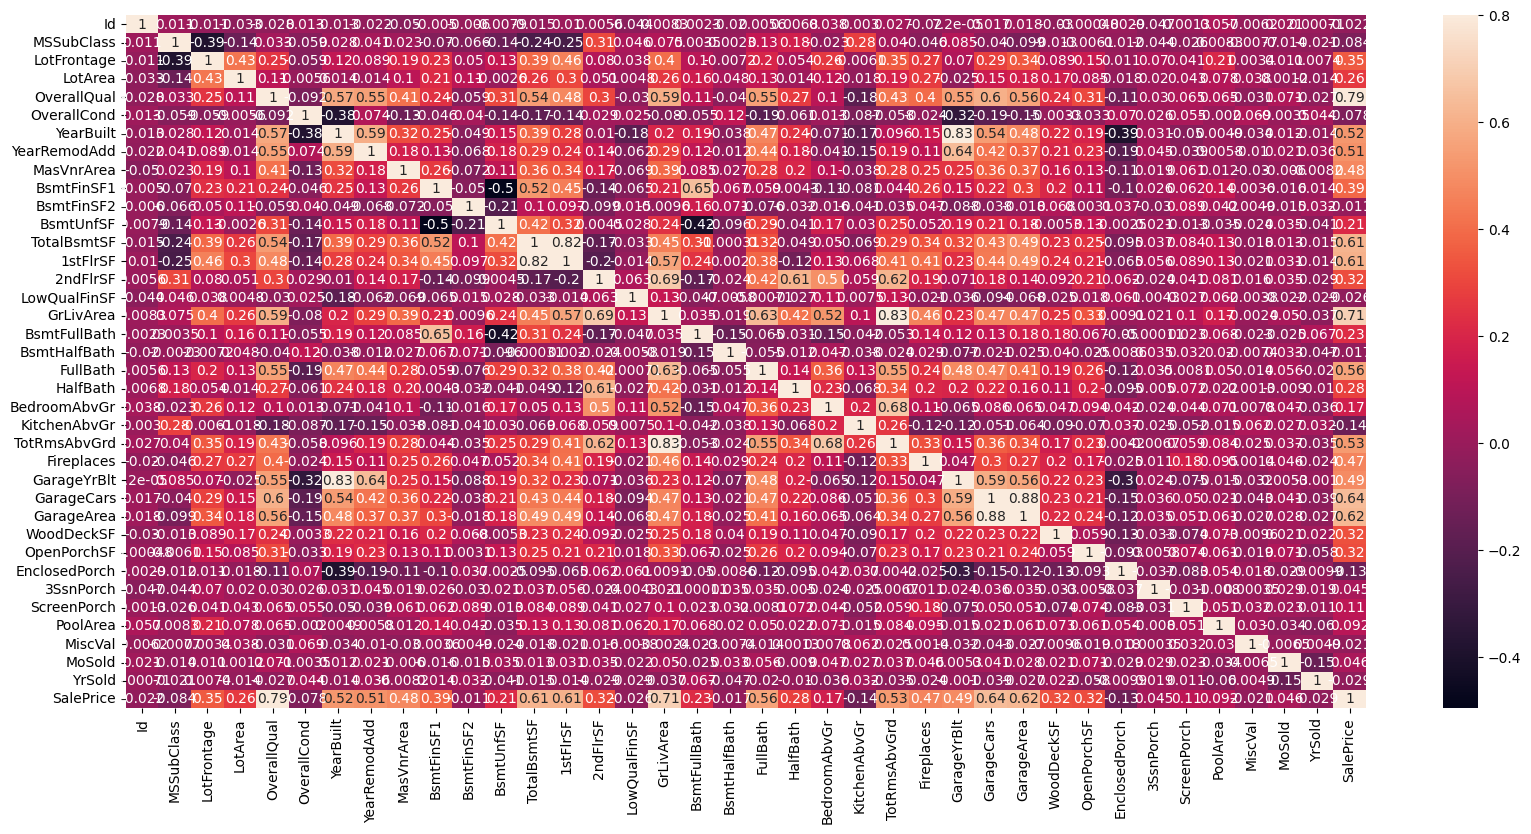

In [200]:
corrmat = X_train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, annot=True);

<ipython-input-201-9e77be603c03>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = X_train.corr()


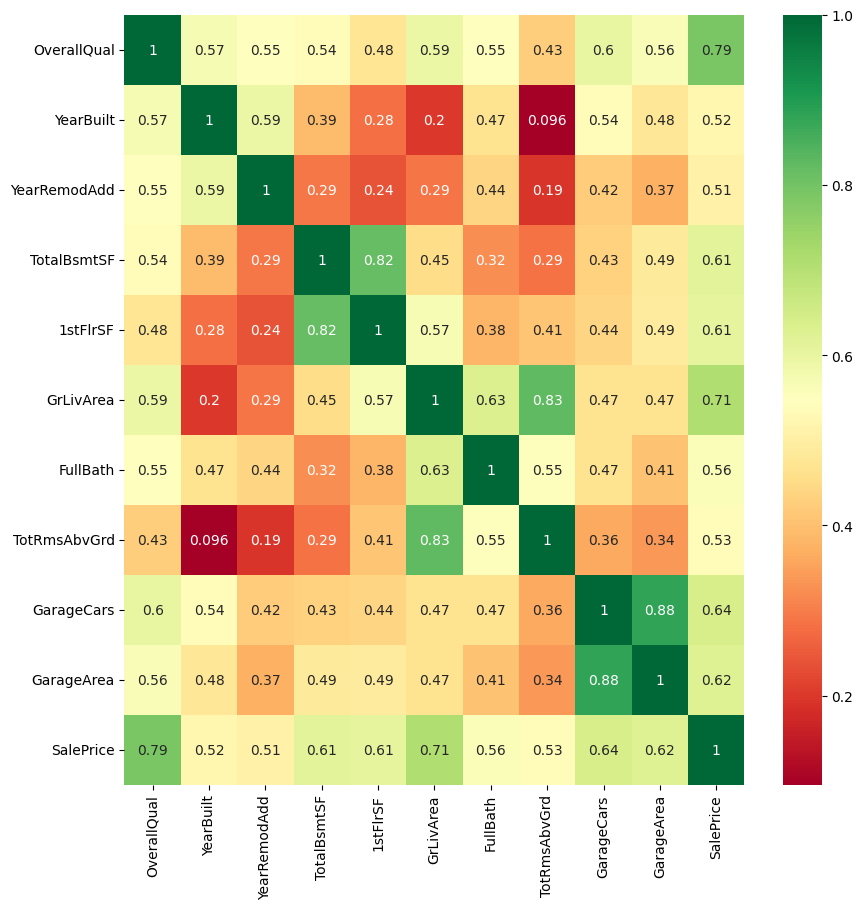

In [201]:
# most correlated features
corrmat = X_train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(X_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [202]:
print("Find most important features relative to target")
corr = X_train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Find most important features relative to target
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   

<ipython-input-202-d441d9381dd3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = X_train.corr()


<Axes: xlabel='OverallQual', ylabel='SalePrice'>

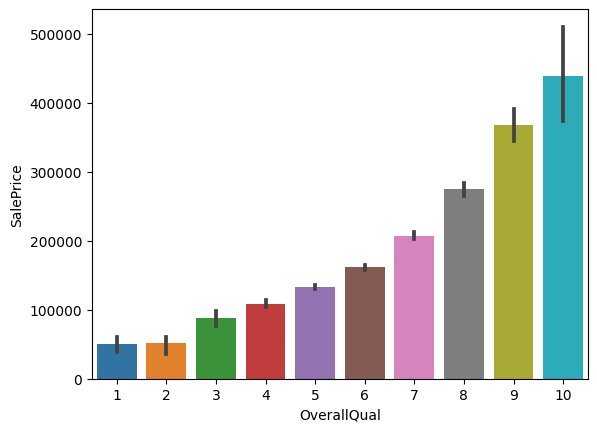

In [203]:
sns.barplot(x=X_train['OverallQual'], y=X_train['SalePrice'])

In [204]:
total = X_train.isnull().sum().sort_values(ascending=False)
percent = (X_train.isnull().sum()/X_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [205]:
# Assuming your dataset is in a variable named 'data'

# Drop columns with high missing value percentages
high_missing_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu','Id']
X_train = X_train.drop(columns=high_missing_cols)

# Fill missing numerical values with median
numerical_cols = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
for col in numerical_cols:
    X_train[col].fillna(X_train[col].median(), inplace=True)

# Fill missing categorical values
categorical_cols = ['GarageCond', 'GarageType', 'GarageFinish', 'GarageQual',
                    'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond',
                    'BsmtFinType1', 'MasVnrType', 'Electrical']
for col in categorical_cols:
    X_train[col].fillna('None', inplace=True)

# Drop rows with missing 'Electrical' (if it's not significant)
X_train.dropna(subset=['Electrical'], inplace=True)


In [206]:
total = X_train.isnull().sum().sort_values(ascending=False)
percent = (X_train.isnull().sum()/X_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
MSSubClass,0,0.0
GarageYrBlt,0,0.0
Fireplaces,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0
KitchenQual,0,0.0
KitchenAbvGr,0,0.0
BedroomAbvGr,0,0.0
HalfBath,0,0.0
FullBath,0,0.0


In [207]:
y_train=X_train["SalePrice"]
X_train=X_train.drop(columns="SalePrice")

In [208]:

from sklearn.preprocessing import OneHotEncoder
# Assuming categorical_cols contains the names of categorical columns
# Convert categorical columns to one-hot encoding
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

encoder = OneHotEncoder(sparse=False)
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])

encoded_column_names = encoder.get_feature_names_out(input_features=categorical_cols)

X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_column_names)

X_train_processed = pd.concat([X_train_encoded_df, X_train[numerical_cols]], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [209]:
from sklearn.feature_selection import SelectFromModel, SelectKBest
from sklearn.feature_selection import f_regression

K = 50
selected_features_kbest = SelectKBest(score_func=f_regression, k=K)
feature_scores = selected_features_kbest.fit(X_train_processed, y_train)
scores = pd.DataFrame(feature_scores.scores_)
columns = pd.DataFrame(X_train_processed.columns)

final_scores = pd.concat([columns, scores], axis=1)
final_scores.columns = ['Features', 'Score']
k_best_scores = final_scores.nlargest(K, "Score")
print(k_best_scores)

              Features        Score
65         OverallQual  2436.770591
77           GrLivArea  1470.585010
87          GarageCars  1013.705666
88          GarageArea   926.951287
73         TotalBsmtSF   880.341282
74            1stFlrSF   845.524488
80            FullBath   668.430296
35         BsmtQual_Ex   642.637454
84        TotRmsAbvGrd   580.762801
67           YearBuilt   548.665821
68        YearRemodAdd   504.714855
69          MasVnrArea   419.328468
85          Fireplaces   406.503866
86         GarageYrBlt   406.113949
39         BsmtQual_TA   375.178052
47    BsmtFinType1_GLQ   339.503144
13    GarageFinish_Fin   311.695809
16    GarageFinish_Unf   295.666793
70          BsmtFinSF1   255.923517
54     MasVnrType_None   227.596252
11   GarageType_Detchd   209.077715
7    GarageType_Attchd   185.501258
63         LotFrontage   184.024149
55    MasVnrType_Stone   178.757033
89          WoodDeckSF   171.494673
75            2ndFlrSF   165.561151
90         OpenPorchSF   161

<Axes: title={'center': 'SelectKBest Score'}, xlabel='Score', ylabel='Features'>

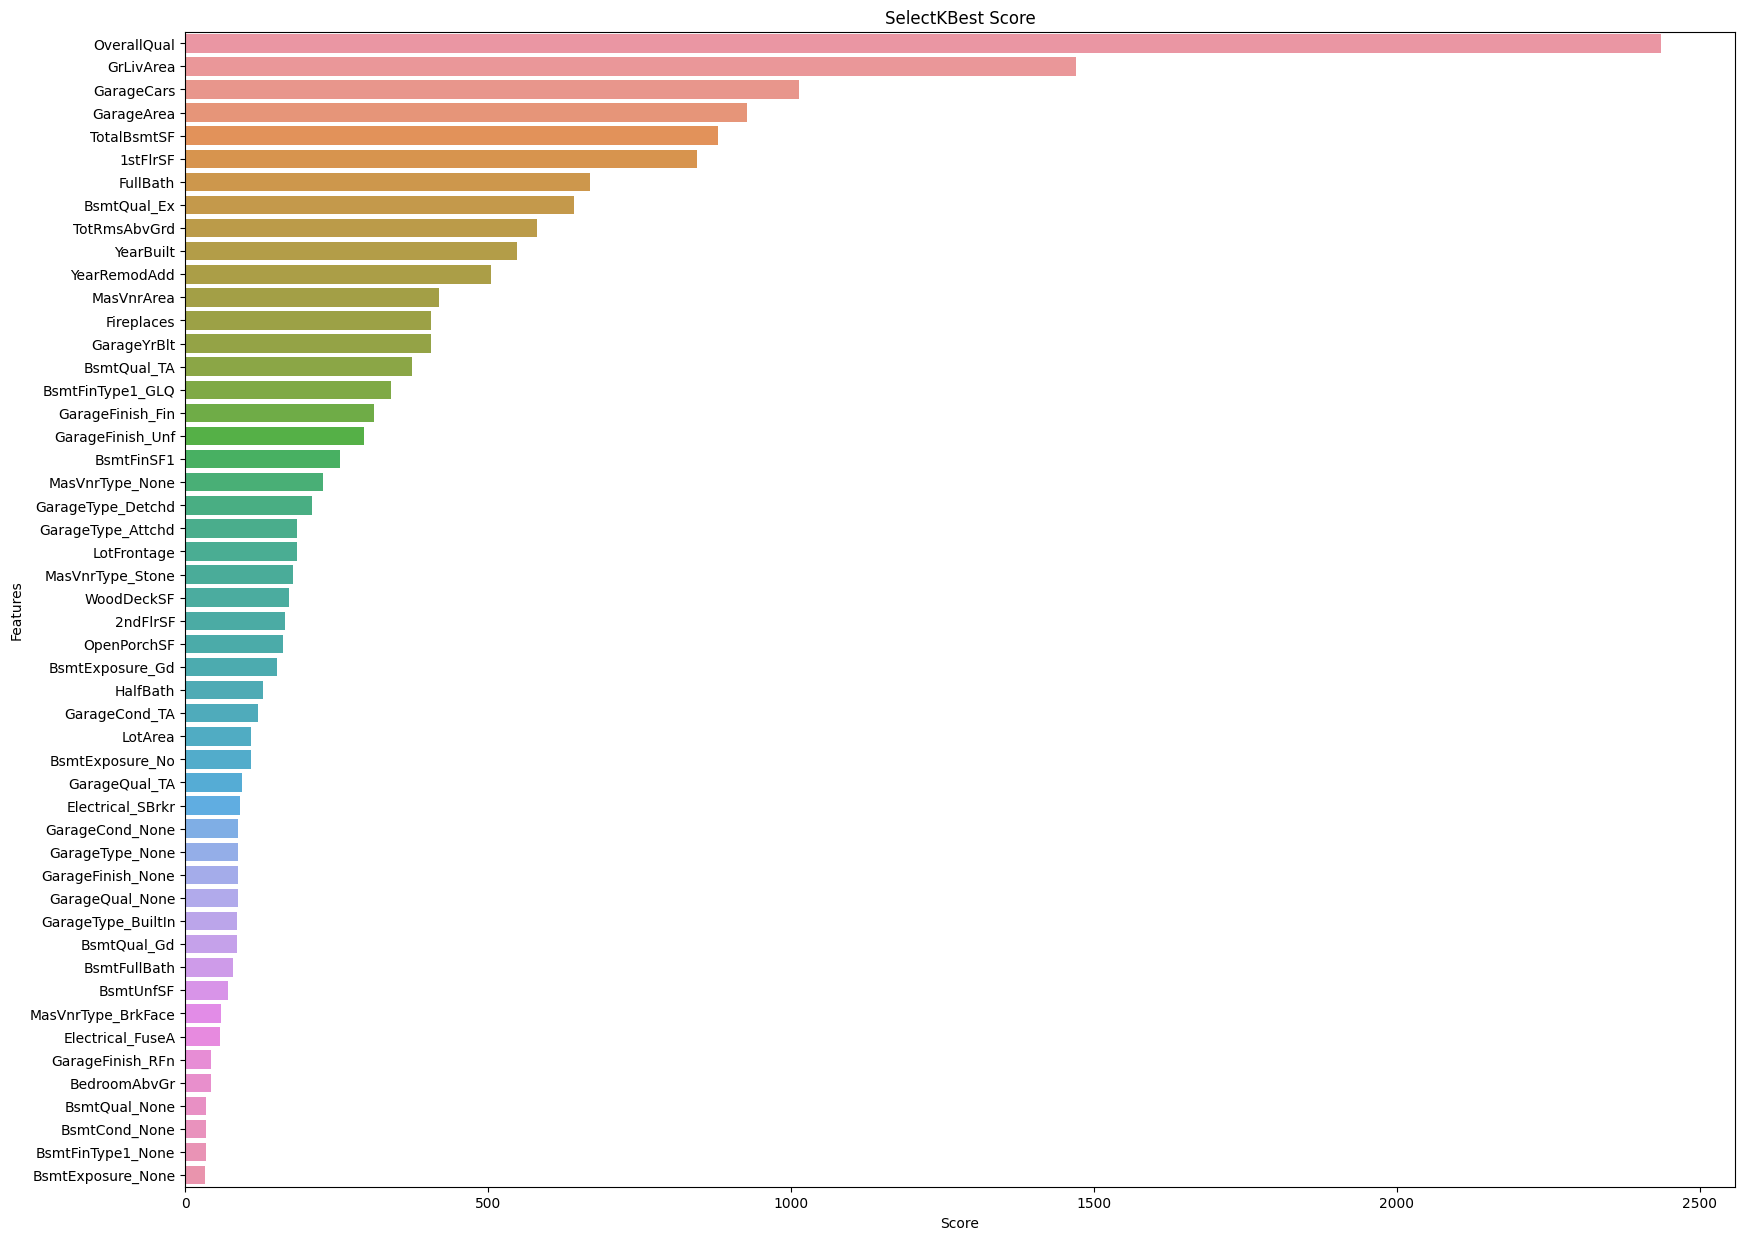

In [210]:
plt.figure(figsize=(20, 15))
plt.title("SelectKBest Score")
sns.barplot(x=k_best_scores["Score"], y=k_best_scores['Features'])

In [211]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler

top_features = k_best_scores['Features'].head(10)

features = X_train_processed[top_features]
# Standardize the data


X_train, x_val_test, y_train, y_val_test = train_test_split(features, y_train, test_size=0.4)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

x_val_test = scaler.transform(x_val_test)

min_max_Scaler = MinMaxScaler()  # Using MinMaxScaler for the target variable
y_train = min_max_Scaler.fit_transform(y_train.values.reshape(-1, 1))  # Reshape y_train if it's a 1D array

y_val_test = min_max_Scaler.transform(y_val_test.values.reshape(-1, 1))  # Reshape y_train if it's a 1D array

X_val, X_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.5)


In [212]:
top_features.values

array(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'BsmtQual_Ex',
       'TotRmsAbvGrd', 'YearBuilt'], dtype=object)

# SVR

In [213]:

svm_regressor = SVR(kernel='rbf')

svm_regressor.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [214]:
from sklearn.metrics import mean_squared_error, r2_score


svm_regressor = SVR(kernel='rbf')

svm_regressor.fit(X_train, y_train)

y_train_pred = svm_regressor.predict(X_train)
# Making predictions on the validation set

y_val_pred = svm_regressor.predict(X_val)
# Calculating the MSE for the validation set
mse_valid = mean_squared_error(y_val, y_val_pred)
print("Validation Mean Squared Error:", mse_valid)

# Making predictions on the test set
y_test_pred = svm_regressor.predict(X_test)
# Calculating the MSE for the test set
mse_test = mean_squared_error(y_test, y_test_pred)
print("Test Mean Squared Error:", mse_test)

mse_train = mean_squared_error(y_train, y_train_pred)
print("Train Mean Squared Error:", mse_train)

# Calculate and print R-squared scores
train_r2_score = r2_score(y_train, svm_regressor.predict(X_train))
valid_r2_score = r2_score(y_val, y_val)
test_r2_score = r2_score(y_test, y_test_pred)

print("R-squared score (Training):", train_r2_score)
print("R-squared score (Validation):", valid_r2_score)
print("R-squared score (Test):", test_r2_score)

Validation Mean Squared Error: 0.003112762517261248
Test Mean Squared Error: 0.003555147896816548
Train Mean Squared Error: 0.0025177757284130698
R-squared score (Training): 0.795580351514293
R-squared score (Validation): 1.0
R-squared score (Test): 0.6941273502432875


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Neural Network

In [215]:
# Define the neural network architecture
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer with 1 neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Epoch 1/50
28/28 [==============================] - 1s 7ms/step - loss: 0.1135 - val_loss: 0.0138
Epoch 2/50
28/28 [==============================] - 0s 3ms/step - loss: 0.0521 - val_loss: 0.0085
Epoch 3/50
28/28 [==============================] - 0s 3ms/step - loss: 0.0373 - val_loss: 0.0065
Epoch 4/50
28/28 [==============================] - 0s 4ms/step - loss: 0.0231 - val_loss: 0.0056
Epoch 5/50
28/28 [==============================] - 0s 3ms/step - loss: 0.0205 - val_loss: 0.0062
Epoch 6/50
28/28 [==============================] - 0s 3ms/step - loss: 0.0180 - val_loss: 0.0054
Epoch 7/50
28/28 [==============================] - 0s 3ms/step - loss: 0.0142 - val_loss: 0.0065
Epoch 8/50
28/28 [==============================] - 0s 3ms/step - loss: 0.0122 - val_loss: 0.0052
Epoch 9/50
28/28 [==============================] - 0s 5ms/step - loss: 0.0110 - val_loss: 0.0046
Epoch 10/50
28/28 [==============================] - 0s 4ms/step - loss: 0.0098 - val_loss: 0.0047
Epoch 11/50
28/28 [

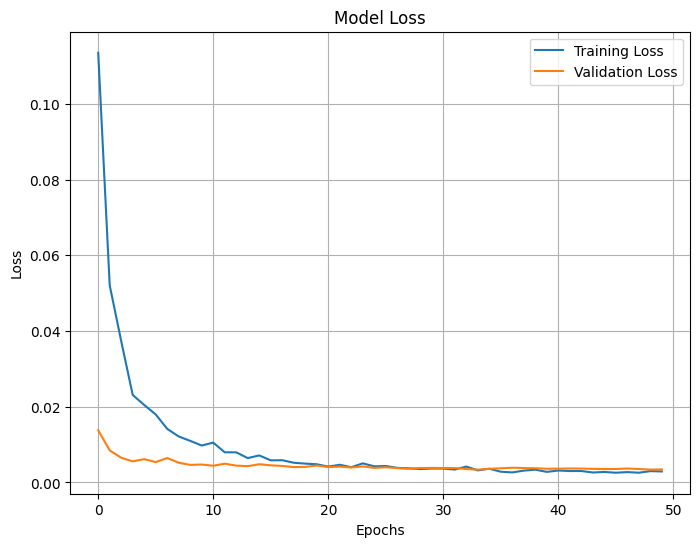

In [216]:
import matplotlib.pyplot as plt

# Assuming 'history' contains the training history from model.fit()

# Plot training & validation loss values
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [217]:

test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss}')

# Evaluate the model on the training set
train_loss = model.evaluate(X_train , y_train, verbose=0)
print(f'Training Loss: {train_loss}')

# Evaluate the model on the training set
val_loss = model.evaluate(X_val, y_val, verbose=0)
print(f'Training Loss: {val_loss}')


Test Loss: 0.004787558224052191
Training Loss: 0.002011743141338229
Training Loss: 0.0034544970840215683


# Linear Regression

In [218]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create and fit the linear regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Predictions on the training set
y_train_pred = linear_regressor.predict(X_train)

# Predictions on the validation set
y_val_pred = linear_regressor.predict(X_val)

# Calculate Mean Squared Error (MSE) for validation set
mse_valid = mean_squared_error(y_val, y_val_pred)
print("Validation Mean Squared Error:", mse_valid)

# Predictions on the test set
y_test_pred = linear_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) for test set
mse_test = mean_squared_error(y_test, y_test_pred)
print("Test Mean Squared Error:", mse_test)

# Calculate Mean Squared Error (MSE) for training set
mse_train = mean_squared_error(y_train, y_train_pred)
print("Train Mean Squared Error:", mse_train)

# Calculate and print R-squared scores
train_r2_score = r2_score(y_train, y_train_pred)
valid_r2_score = r2_score(y_val, y_val_pred)
test_r2_score = r2_score(y_test, y_test_pred)

print("R-squared score (Training):", train_r2_score)
print("R-squared score (Validation):", valid_r2_score)
print("R-squared score (Test):", test_r2_score)


Validation Mean Squared Error: 0.002597331971190884
Test Mean Squared Error: 0.004415712275296488
Train Mean Squared Error: 0.002089530285829726
R-squared score (Training): 0.8303498434315376
R-squared score (Validation): 0.7869025590033591
R-squared score (Test): 0.6200873624926793
